In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta as ta
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from mom import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
df_dict = {}
candidate = ['SOL']#,'XRP','ETH']#['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
for coin in candidate:
    try:
        df_dict[coin] = get_data(coin)
    except:
        pass

APY: 203.70 %
MDD: 16.41 %
MDD Duration 96 days 00:00:00
worst trade: -19.75 %
2022-05-31 03:00:00 ~ 2022-06-03 20:00:00
avg holding days: 6.33 days
--------------------------------------------
PF: 2.59
Sharpe Ratio: 2.57
Calmar Ratio: 8.03
Sortino Ratio: 3.92
Omega Ratio: 1.11
--------------------------------------------
Expectancy : 4.69 %
Total Time Exposure : 75.33 %
Total Trades: 81
Win Rate: 55.56 %
--------------------------------------------
PF * Win Rate: 1.441


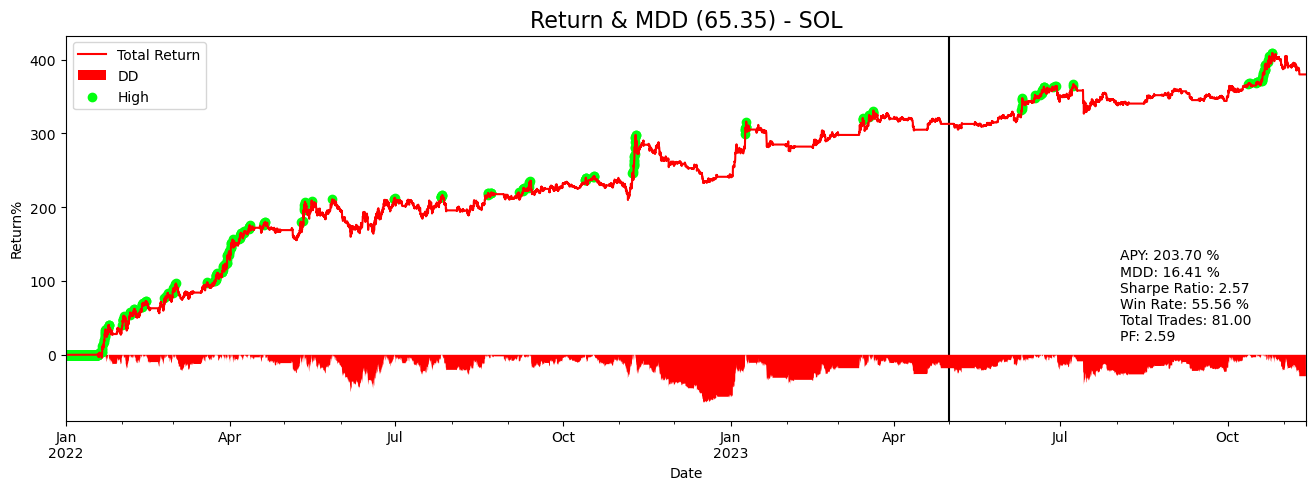

(None,
 Start                         2022-01-01 00:00:00
 End                           2023-11-13 00:00:00
 Period                          681 days 01:00:00
 Start Value                               10000.0
 Min Value                             9603.921643
 Max Value                            50906.584837
 End Value                            48005.479493
 Total Return [%]                       380.054795
 Benchmark Return [%]                   -67.334687
 Total Time Exposure [%]                 75.325788
 Max Gross Exposure [%]                 108.185807
 Max Drawdown [%]                        16.412589
 Max Drawdown Duration            96 days 00:00:00
 Total Orders                                  153
 Total Fees Paid                        487.306729
 Total Trades                                   81
 Win Rate [%]                            55.555556
 Best Trade [%]                          66.295315
 Worst Trade [%]                        -19.752014
 Avg Winning Trade [%]  

In [3]:
start = '2022-01-01'
sep = ''
end = ''

side = 'both'
# v2
params = {'window_l_k': 172, 'window_l_d': 104, 'window_s_k': 104, 'window_s_d': 120}
# params = {'upper_bound': 90, 'rv_sum': 60, 'rv_rolling': 128}
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'SOL'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
# analyze.plot_ret_dist(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

<AxesSubplot:xlabel='Entry Index'>

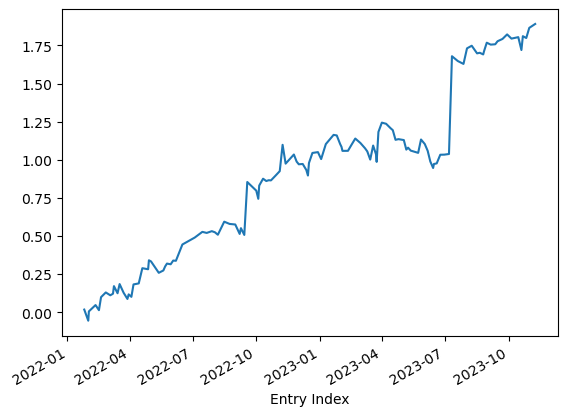

In [58]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

======================= ETH LONG Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Pl

Optimization time: 172.07 sec
---------- ETH LONG ----------
{'window_l_k': 52, 'window_l_d': 128, 'window_s_k': 36, 'window_s_d': 36}
APY: 83.92 %
MDD: 20.99 %
MDD Duration 121 days 05:00:00
worst trade: -9.09 %
2022-08-24 08:00:00 ~ 2022-08-28 15:00:00
avg holding days: 5.40 days
--------------------------------------------
PF: 2.44
Sharpe Ratio: 1.76
Calmar Ratio: 3.60
Sortino Ratio: 2.64
Omega Ratio: 1.10
--------------------------------------------
Expectancy : 3.01 %
Total Time Exposure : 41.08 %
Total Trades: 37
Win Rate: 54.05 %
--------------------------------------------
PF * Win Rate: 1.320


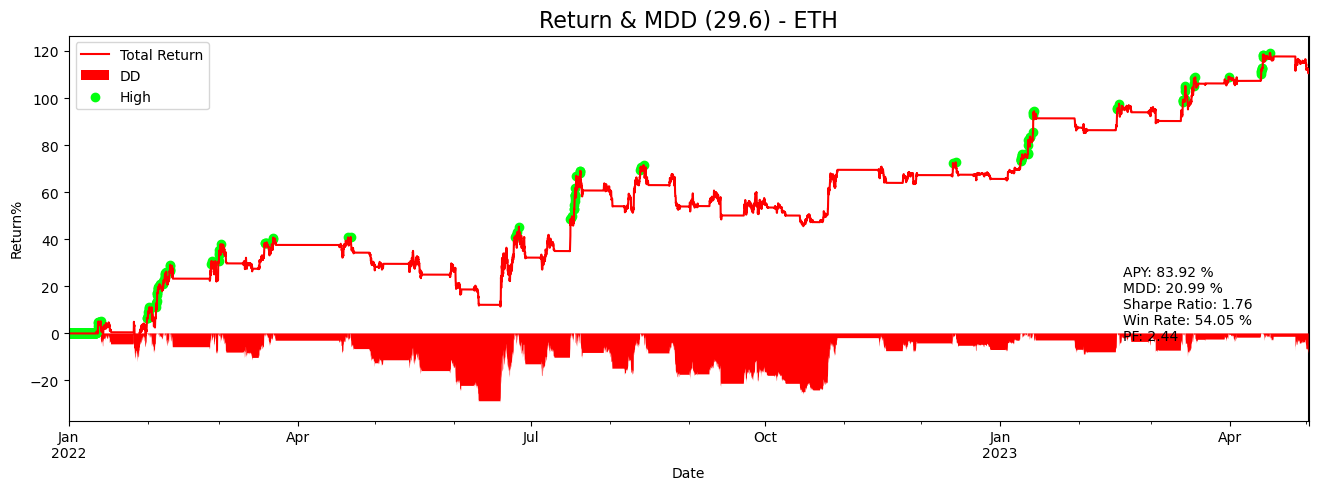

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     37.62 | 3988.31 |  -226.48 |      17.61 |   80    |          5 |
| 2022-06    |     -5.38 | 2134.09 | -2672    |       0.8  |   28.57 |          7 |
| 2022-09    |     21.3  | 4107.25 | -1977.44 |       2.08 |   62.5  |          8 |
| 2022-12    |     12.16 | 2569.98 | -1353.72 |       1.9  |   42.86 |          7 |
| 2023-03    |     41.66 | 5041.2  |  -875.12 |       5.76 |   62.5  |          8 |
| 2023-06    |      4.15 | 1040.82 |  -626.03 |       1.66 |   50    |          2 |
+------------+-----------+---------+----------+------------+---------+------------+
-------------------1h is done----------------------
======================= ETH SHORT Optimize Test =======================
Optimization trails: 4225


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   33.7s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   51.7s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4225 out of 4225 | elapsed:  2.5min finished


Optimization time: 153.0 sec
---------- ETH SHORT ----------
{'window_l_k': 36, 'window_l_d': 36, 'window_s_k': 220, 'window_s_d': 56}
APY: 94.93 %
MDD: 13.58 %
MDD Duration 120 days 09:00:00
worst trade: -12.04 %
2022-08-10 09:00:00 ~ 2022-08-11 11:00:00
avg holding days: 4.15 days
--------------------------------------------
PF: 3.02
Sharpe Ratio: 2.49
Calmar Ratio: 6.23
Sortino Ratio: 3.91
Omega Ratio: 1.16
--------------------------------------------
Expectancy : 3.32 %
Total Time Exposure : 32.48 %
Total Trades: 38
Win Rate: 44.74 %
--------------------------------------------
PF * Win Rate: 1.350


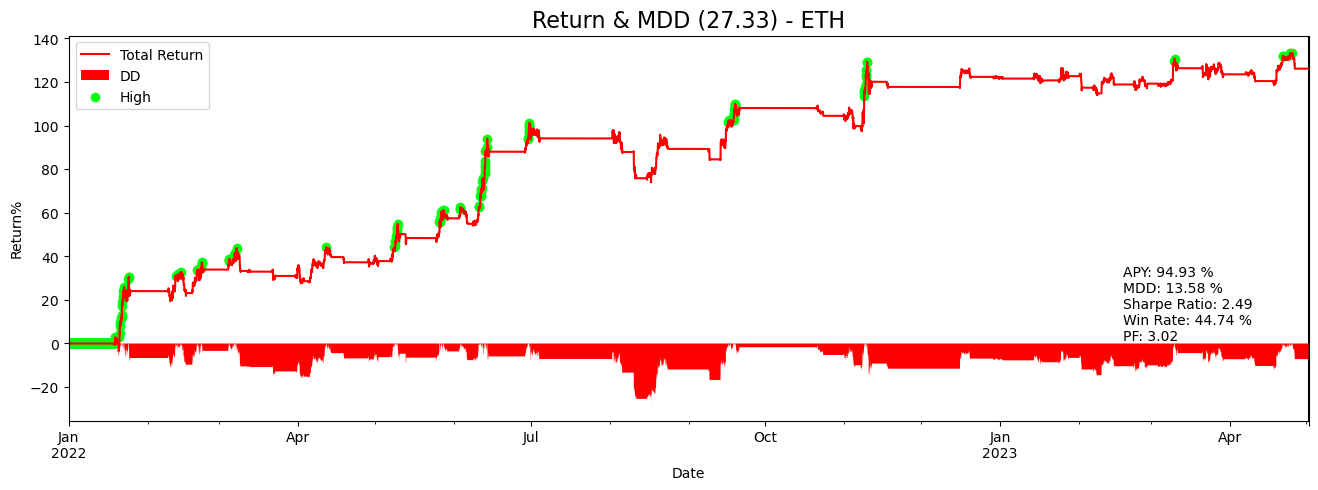

+------------+-----------+---------+----------+------------+---------+------------+
| datetime   |   收益率% |    毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+---------+----------+------------+---------+------------|
| 2022-03    |     28.62 | 3481.07 |  -619.77 |       5.62 |   28.57 |          7 |
| 2022-06    |     65.53 | 7270.73 |  -717.66 |      10.13 |   60    |         10 |
| 2022-09    |     13.93 | 3701.76 | -2309.24 |       1.6  |   40    |          5 |
| 2022-12    |     13.53 | 2492.56 | -1139.85 |       2.19 |   33.33 |          6 |
| 2023-03    |      1.95 | 1352.9  | -1157.56 |       1.17 |   50    |          8 |
| 2023-06    |      2.59 |  568.34 |  -309.61 |       1.84 |   50    |          2 |
+------------+-----------+---------+----------+------------+---------+------------+
-------------------1h is done----------------------


In [3]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['ETH'] #,'XRP']
sample_sets = [[start,end]]
freq = '1h'

for direction in ['long','short']:
    if direction == 'long':
        params={
            'window_l_k': [36, 296, 4],
            'window_l_d': [36, 296, 4],
            'window_s_k': [36, 296, 300],
            'window_s_d': [36, 296, 300]}
    else:
        params={
            'window_l_k': [36, 296, 300],
            'window_l_d': [36, 296, 300],
            'window_s_k': [36, 296, 4],
            'window_s_d': [36, 296, 4]}

    config = {'freq':freq,'fee': 0.0003}
    multi_test = MultiTester(
        Strategy,
        get_data_func=get_data,
        params=params,
        config=config,
        symbol_list=symbol_list,
        start=start,
        end=end
        )

    all_params = multi_test.multi_params(symbol_list,sample_sets,direction=direction)
    trades, value_df = multi_test.multi_params_result(all_params)
    print(f'-------------------{freq} is done----------------------')